# Policy Exploration Create

Exploring and modifying the policy dataset to make it more trainable 

In [1]:
import pandas as pd
from random import randrange
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]
import math

### DOWNLOAD THE POLICY DATASET FROM REPO
### SAVE Policy Data to data folder

In [2]:
# !curl -l https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_withnotes_2021.csv > ../data/data_policy_2021.csv

In [3]:
# !curl -l https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_withnotes_2022.csv > ../data/data_policy_2022.csv

In [4]:
# Change here to generate for each year (2021,2022) + 2020
year = '2020'

In [5]:
# Read 
df = pd.read_csv(f'../data/data_policy_{year}.csv',parse_dates=['Date'])

# Only USA 
df = df[df['CountryCode']=='USA']

# Reset index for convenience
df = df.reset_index(drop=True)

print(df['RegionName'].unique())

df.head()


[nan 'Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'Washington DC' 'Delaware' 'Florida' 'Georgia' 'Hawaii'
 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana'
 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota' 'Missouri'
 'Mississippi' 'Montana' 'North Carolina' 'North Dakota' 'Nebraska'
 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada' 'New York' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia' 'Vermont'
 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming']


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,United States,USA,NaN,NaN,NAT_TOTAL,2022-01-01,2.0,0.0,NaN,2.0,...,53.24,53.24,63.81,63.81,52.6,52.6,60.12,60.12,0.0,0.0
1,United States,USA,NaN,NaN,NAT_TOTAL,2022-01-02,2.0,0.0,NaN,2.0,...,53.24,53.24,63.81,63.81,52.6,52.6,60.12,60.12,0.0,0.0
2,United States,USA,NaN,NaN,NAT_TOTAL,2022-01-03,2.0,0.0,NaN,2.0,...,53.24,53.24,63.81,63.81,52.6,52.6,60.12,60.12,0.0,0.0
3,United States,USA,NaN,NaN,NAT_TOTAL,2022-01-04,2.0,0.0,Several school districts across the country ar...,2.0,...,53.24,53.24,63.81,63.81,52.6,52.6,60.12,60.12,0.0,0.0
4,United States,USA,NaN,NaN,NAT_TOTAL,2022-01-05,2.0,0.0,NaN,2.0,...,53.24,53.24,63.81,63.81,52.6,52.6,60.12,60.12,0.0,0.0


In [6]:
df['RegionName'] = df['RegionName'].replace(['Washington DC'],'Washington')

In [7]:
# Getting a state wise list 
states = df['RegionName'].dropna().unique()

In [8]:
states

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Washington', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
       'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland',
       'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi',
       'Montana', 'North Carolina', 'North Dakota', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Wisconsin', 'West Virginia', 'Wyoming'],
      dtype=object)

# 1. State Specific Policy Processing 

## 1.1 Individual States : Isolation

In [9]:
# Good columns to keep in the dataframe
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]

In [10]:
STATE_PICK = states[randrange(len(states))]
print(f'State Picked : {STATE_PICK}')

State Picked : Illinois


In [11]:
# Selecting only the required state 
target_df = df[df['RegionName']==STATE_PICK]

# Sorting by date
target_df = target_df.sort_values(by='Date')

# Removing all the colmuns except GOODCOLUMNS and Date 
target_df = target_df[GOOD_COLUMNS + ['Date'] + ['RegionName']]

In [12]:
target_df.head()
target_df.reset_index(drop=True)

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,Date,RegionName
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,2.0,5.0,2022-01-01,Illinois
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,2.0,5.0,2022-01-02,Illinois
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,2.0,5.0,2022-01-03,Illinois
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,2.0,5.0,2022-01-04,Illinois
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,2.0,5.0,2022-01-05,Illinois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-10,Illinois
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-11,Illinois
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-12,Illinois
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-13,Illinois


## 1.2 Individual States Metric Finding

In [13]:
OUTPUT_DATABASE = []

for index,column_pick in enumerate(GOOD_COLUMNS):
#     print('\n')
    
    # isolate the policy with the dates of implementation or change 
    df_process = target_df[[column_pick,'Date']]
    
    # Finding change and saving them as a diff column
    target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();
    
    # Finding unique values in the diff column
    change_values = target_df[f'{column_pick}_diff'].unique().tolist()
    
    
    change_values_cleaned = []
    for i in change_values:
        if i and not math.isnan(i):
            change_values_cleaned.append(i)
                
#     print(f'Unique Values in column {column_pick}: {change_values}')
#     print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')
    
    for unique_change_value_iterator in change_values_cleaned:
        # Getting the index of change 
        elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

        # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
        output_row = {}
        date_implement = target_df.loc[elemnts]['Date'].values[0]
        policy = column_pick
        metric_change = unique_change_value_iterator
        output_row['date_implement'] = date_implement
        output_row['policy'] = policy
        output_row['metric_change'] = metric_change
        output_row['state'] = STATE_PICK
        
        
        OUTPUT_DATABASE.append(output_row)

STATE_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)
    

In [14]:
print(f'Number of policy changes in the {STATE_PICK} in the year of {year} : {len(STATE_POLICY_CHANGE)}')

Number of policy changes in the Illinois in the year of 2022 : 0


## 1.3 Generalizing to all States

In [15]:
STATE_POLICY_APPEND = [] 

In [16]:
# Good columns to keep in the dataframe
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]

In [17]:
for STATE_PICK in states :
#     print(STATE_PICK)
    # Selecting only the required state 
    target_df = df[df['RegionName']==STATE_PICK]

    # Sorting by date
    target_df = target_df.sort_values(by='Date')

    # Removing all the colmuns except GOODCOLUMNS and Date 
    target_df = target_df[GOOD_COLUMNS + ['Date'] + ['RegionName']]
    target_df.head()
    target_df.reset_index(drop=True)
    
    OUTPUT_DATABASE = []

    for index,column_pick in enumerate(GOOD_COLUMNS):
    #     print('\n')

        # isolate the policy with the dates of implementation or change 
        df_process = target_df[[column_pick,'Date']]

        # Finding change and saving them as a diff column
        target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();

        # Finding unique values in the diff column
        change_values = target_df[f'{column_pick}_diff'].unique().tolist()


        change_values_cleaned = []
        for i in change_values:
            if i and not math.isnan(i):
                change_values_cleaned.append(i)

    #     print(f'Unique Values in column {column_pick}: {change_values}')
    #     print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')

        for unique_change_value_iterator in change_values_cleaned:
            # Getting the index of change 
            elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

            # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
            output_row = {}
            date_implement = target_df.loc[elemnts]['Date'].values[0]
            policy = column_pick
            metric_change = unique_change_value_iterator
            output_row['date_implement'] = date_implement
            output_row['policy'] = policy
            output_row['metric_change'] = metric_change
#             output_row['metric_value'] = metric_value
            output_row['state'] = STATE_PICK


            OUTPUT_DATABASE.append(output_row)

    STATE_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)
    STATE_POLICY_APPEND.append(STATE_POLICY_CHANGE)
    
    print(f'Number of policy changes in the {STATE_PICK} in the year of {year} : {len(STATE_POLICY_CHANGE)}')
    

Number of policy changes in the Alaska in the year of 2022 : 9
Number of policy changes in the Alabama in the year of 2022 : 4
Number of policy changes in the Arkansas in the year of 2022 : 2
Number of policy changes in the Arizona in the year of 2022 : 0
Number of policy changes in the California in the year of 2022 : 6
Number of policy changes in the Colorado in the year of 2022 : 5
Number of policy changes in the Connecticut in the year of 2022 : 4
Number of policy changes in the Washington in the year of 2022 : 8
Number of policy changes in the Delaware in the year of 2022 : 1
Number of policy changes in the Florida in the year of 2022 : 4
Number of policy changes in the Georgia in the year of 2022 : 1
Number of policy changes in the Hawaii in the year of 2022 : 8
Number of policy changes in the Iowa in the year of 2022 : 3
Number of policy changes in the Idaho in the year of 2022 : 2
Number of policy changes in the Illinois in the year of 2022 : 0
Number of policy changes in the I

In [18]:
FINAL_FOR_YEAR = pd.concat(STATE_POLICY_APPEND)

In [19]:
FINAL_FOR_YEAR.to_csv(f'../outputs/processed_{year}_statePolChange.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/processed_2022_statePolChange.csv'

# NATIONAL SPECIFIC POLICIES 

In [19]:
df

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19027,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-27,2.0,0.0,NaN,1.0,...,68.52,68.52,72.62,72.62,63.75,63.75,65.71,65.71,50.0,50.0
19028,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-28,2.0,0.0,NaN,1.0,...,68.52,68.52,72.62,72.62,63.75,63.75,65.71,65.71,50.0,50.0
19029,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-29,2.0,0.0,NaN,1.0,...,68.52,68.52,72.62,72.62,63.75,63.75,65.71,65.71,50.0,50.0
19030,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-30,1.0,1.0,Jackson schools are hybrid and will continue t...,1.0,...,61.11,61.11,72.62,72.62,60.83,60.83,62.38,62.38,50.0,50.0


In [20]:

#     print(STATE_PICK)
# Selecting only the required state 
target_df = df[df['Jurisdiction']=='NAT_TOTAL']

# Sorting by date
target_df = target_df.sort_values(by='Date')

# Removing all the colmuns except GOODCOLUMNS and Date 
target_df = target_df[GOOD_COLUMNS + ['Date'] + ['RegionName']]
target_df.head()
target_df.reset_index(drop=True)

OUTPUT_DATABASE = []

for index,column_pick in enumerate(GOOD_COLUMNS):
#     print('\n')

    # isolate the policy with the dates of implementation or change 
    df_process = target_df[[column_pick,'Date']]

    # Finding change and saving them as a diff column
    target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();

    # Finding unique values in the diff column
    change_values = target_df[f'{column_pick}_diff'].unique().tolist()


    change_values_cleaned = []
    for i in change_values:
        if i and not math.isnan(i):
            change_values_cleaned.append(i)

#     print(f'Unique Values in column {column_pick}: {change_values}')
#     print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')

    for unique_change_value_iterator in change_values_cleaned:
        # Getting the index of change 
        elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

        # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
        output_row = {}
        date_implement = target_df.loc[elemnts]['Date'].values[0]
        policy = column_pick
        metric_change = unique_change_value_iterator
        output_row['date_implement'] = date_implement
        output_row['policy'] = policy
        output_row['metric_change'] = metric_change
#             output_row['metric_value'] = metric_value
        output_row['state'] = 'national'


        OUTPUT_DATABASE.append(output_row)

NATIONAL_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)


# print(f'Number of policy changes in the {C} in the year of {year} : {len(STATE_POLICY_CHANGE)}')


In [21]:
df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,United States,USA,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Date'>

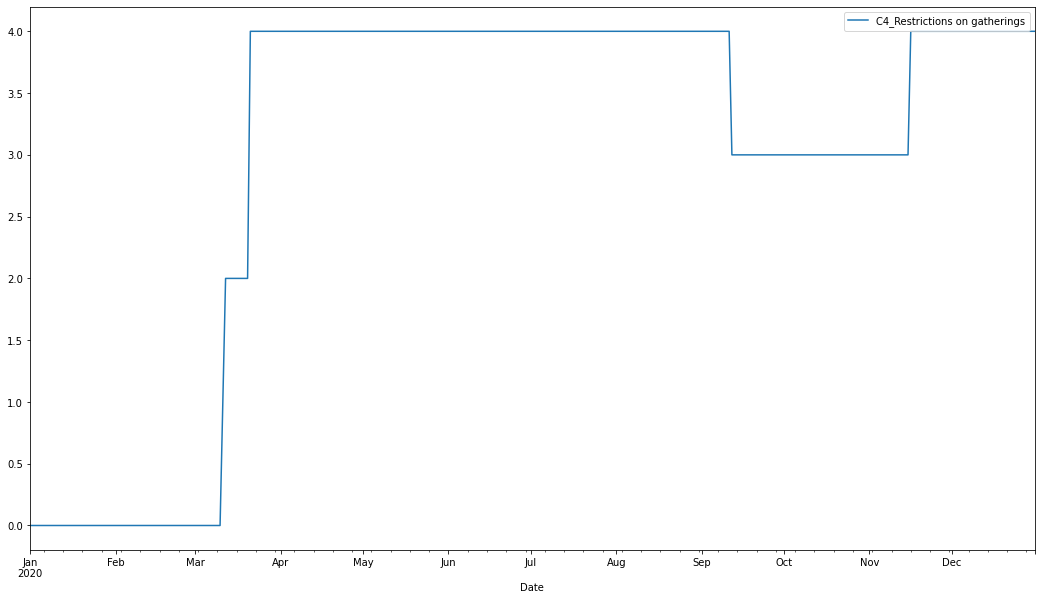

In [22]:
df[df['Jurisdiction']=='NAT_TOTAL'].plot(x='Date',y='C4_Restrictions on gatherings')

In [23]:
NATIONAL_POLICY_CHANGE.to_csv(f'../outputs/processed_{year}_natPolChange.csv')